<a href="https://colab.research.google.com/github/harsh-vt/transfer_learning/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [34]:
train_data = pd.read_csv('training_data.csv')

In [35]:
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,...,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ
0,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,7,35,0,200,1
1,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0,0,40,0.0,11,5,0,20,1
2,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,40,0.0,12,5,0,305,1
3,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,17,35,0,110,1
4,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,1,0,0,0,85,0.0,19,20,0,75,5


In [32]:
train_data.CQ.unique()

array([1, 5, 3, 4, 2, 6])

In [36]:
train_data['CQ'] -= 1
train_data.CQ.unique()

array([0, 4, 2, 3, 1, 5])

In [37]:
import numpy as np

In [38]:
xy = np.array(train_data)

In [8]:
print(xy)

[[  0.   1.   0. ...   0. 200.   1.]
 [  0.   1.   0. ...   0.  20.   1.]
 [  0.   1.   0. ...   0. 305.   1.]
 ...
 [  1.   0.   0. ...   0.  13.   4.]
 [  1.   0.   0. ...   0.   0.   4.]
 [  0.   0.   1. ...   0.   0.   2.]]


In [39]:
np.random.shuffle(xy)

In [41]:
y = xy[:, -1:]
x = xy[:, 0:-1]
print(y)
print(x)

[[3.]
 [3.]
 [4.]
 ...
 [0.]
 [4.]
 [2.]]
[[  0.   1.   0. ...  60.   0.   0.]
 [  0.   1.   0. ...   5.   0.  15.]
 [  0.   0.   1. ...  15.   0. 265.]
 ...
 [  0.   1.   0. ...  45.   0.   0.]
 [  0.   0.   1. ...  15.   0.   0.]
 [  0.   0.   1. ...  35.   0. 535.]]


In [40]:
x=x/x.max(axis=0)

In [12]:
x.shape 

(3668, 87)

In [42]:
# training data split - 70& for training, 10% for validation, 20% for testing
k = 2568
l = 367
x_train = x[0:k,:]
y_train = y[0:k,:]
x_val = x[k:k+l,:]
y_val = y[k:k+l,:]
x_test = x[k+l:,:]
y_test = y[k+l:,:] 

In [43]:
print(x_train.shape)
# print(x_train)
print()
print(y_train.shape)
# print(y_train)
print()
print(x_val.shape)
# print(x_val)
print()
print(y_val.shape)
# print(y_val)
print()
print(x_test.shape)
# print(x_test)
print()
print(y_test.shape)
# print(y_test)

(2568, 87)

(2568, 1)

(367, 87)

(367, 1)

(733, 87)

(733, 1)


In [44]:
def baseline_model():

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(87, input_dim=input_shape, activation='sigmoid'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(124, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(6,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Epoch 1/200
78/81 [===========================>..] - ETA: 0s - loss: 1.5805 - accuracy: 0.4119
Epoch 00001: saving model to training_1/cp.ckpt
81/81 [==============================] - 0s 4ms/step - loss: 1.5752 - accuracy: 0.4132 - val_loss: 1.3730 - val_accuracy: 0.5450
Epoch 2/200
75/81 [==========================>...] - ETA: 0s - loss: 1.2670 - accuracy: 0.5188
Epoch 00002: saving model to training_1/cp.ckpt
81/81 [==============================] - 0s 3ms/step - loss: 1.2675 - accuracy: 0.5187 - val_loss: 1.1852 - val_accuracy: 0.5232
Epoch 3/200
71/81 [=========================>....] - ETA: 0s - loss: 1.1601 - accuracy: 0.5621
Epoch 00003: saving model to training_1/cp.ckpt
81/81 [==============================] - 0s 3ms/step - loss: 1.1527 - accuracy: 0.5615 - val_loss: 1.0928 - val_accuracy: 0.5722
Epoch 4/200
78/81 [===========================>..] - ETA: 0s - loss: 1.1223 - accuracy: 0.5861
Epoch 00004: saving model to training_1/cp.ckpt
81/81 [==============================] - 

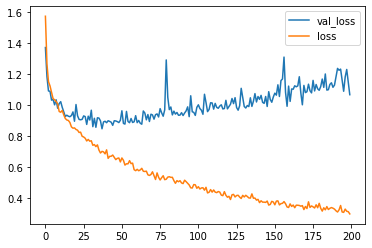

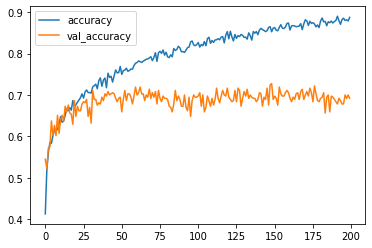

87


In [45]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os

input_shape = x_train.shape[1]

model = baseline_model()

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

hist = model.fit(x_train, y_train, epochs=200,  validation_data=(x_val, y_val), callbacks=[cp_callback])
plt.plot(hist.history['val_loss'])
plt.show
plt.plot(hist.history['loss'])
plt.legend(["val_loss", "loss"], loc ="best") 
plt.show()

plt.plot(hist.history['accuracy'])
plt.show
plt.plot(hist.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"], loc ="best") 
plt.show()
print(input_shape)

In [46]:
testing_predicted = model.evaluate(x_test,y_test) 

23/23 [==============================] - 0s 1ms/step - loss: 1.1246 - accuracy: 0.7067


In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_6 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 87)                348       
_________________________________________________________________
dense_10 (Dense)             (None, 124)               10912     
_________________________________________________________________
dropout_7 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 124)               496       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [48]:
export_path = os.path.abspath(os.getcwd())+'/models/saved_model'
model.save(export_path, save_format='tf')
export_path

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/models/saved_model/assets


'/content/models/saved_model'

In [49]:
# testing data split - 30% from training, 70 % for testing
test_data = pd.read_csv('testing_data.csv')
test_data['CQ'] -= 1
ab = np.array(train_data)
np.random.shuffle(ab)
b = ab[:, -1:]
a = ab[:, 0:-1]
a = a/a.max(axis=0)

k = 1100
a_train = x[0:k,:]
b_train = y[0:k,:]
a_test = x[k:,:]
b_test = y[k:,:] 

print(a_train.shape)
# print(x_train)
print()
print(b_train.shape)
# print(y_train)
print()
print(a_test.shape)
# print(x_test)
print()
print(b_test.shape)
# print(y_test)

(1100, 87)

(1100, 1)

(2568, 87)

(2568, 1)


In [50]:
import_path = os.path.abspath(os.getcwd())+'/models/saved_model'
reloaded_model = tf.keras.models.load_model(import_path)
reloaded_model.summary()
reloaded_model.load_weights(checkpoint_path)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_6 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 87)                348       
_________________________________________________________________
dense_10 (Dense)             (None, 124)               10912     
_________________________________________________________________
dropout_7 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 124)               496       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [51]:
non_trainable_layers = len(reloaded_model.layers)-1
for i in range(1,non_trainable_layers):
  reloaded_model.layers[i].trainable = False
reloaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_6 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 87)                348       
_________________________________________________________________
dense_10 (Dense)             (None, 124)               10912     
_________________________________________________________________
dropout_7 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 124)               496       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [52]:
reloaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reloaded_model.fit(a_train, b_train, epochs=200, verbose=1)

Epoch 1/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.9018
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9045
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9064
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9082
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9200
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9200
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9218
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9127
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9118
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9200
Epoch 11/

In [53]:
training_predicted = model.evaluate(a_test,b_test) 
print("testing_predicted: ", testing_predicted)
print()
print("training_predicted: ", training_predicted)


81/81 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.8481
testing_predicted:  [1.1245524883270264, 0.7066848278045654]

training_predicted:  [0.5519579648971558, 0.8481308221817017]
